In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\Ulum\Downloads\eco_driving_score.csv')
df.head()

,rpm_variation,harsh_braking_count,idling_time,fuel_consumption,acceleration_smoothness,eco_score
0,2147,5,14.2,7.87,0.97,42.1
1,1703,3,4.2,9.37,0.50,36.1
2,2253,0,5.5,8.85,0.78,49.8
3,2866,3,21.7,5.87,0.60,27.7
4,1636,2,3.1,6.71,0.99,79.4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rpm_variation            30000 non-null  int64  
 1   harsh_braking_count      30000 non-null  int64  
 2   idling_time              30000 non-null  float64
 3   fuel_consumption         30000 non-null  float64
 4   acceleration_smoothness  30000 non-null  float64
 5   eco_score                30000 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.4 MB


In [6]:
df.isnull().sum()

rpm_variation              0
harsh_braking_count        0
idling_time                0
fuel_consumption           0
acceleration_smoothness    0
eco_score                  0
dtype: int64

In [11]:
round(df.describe(),2)

,rpm_variation,harsh_braking_count,idling_time,fuel_consumption,acceleration_smoothness,eco_score
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,1807.95,2.73,11.28,8.05,0.67,47.49
std,679.42,1.67,5.29,1.51,0.16,19.46
min,500.00,0.00,0.00,3.50,0.03,0.00
25%,1325.00,2.00,7.60,7.03,0.56,34.60
50%,1801.00,3.00,11.20,8.04,0.67,48.40
75%,2272.00,4.00,14.90,9.05,0.78,61.30
max,4935.00,14.00,32.50,14.43,1.00,100.00


## Exploratory Data Analyst

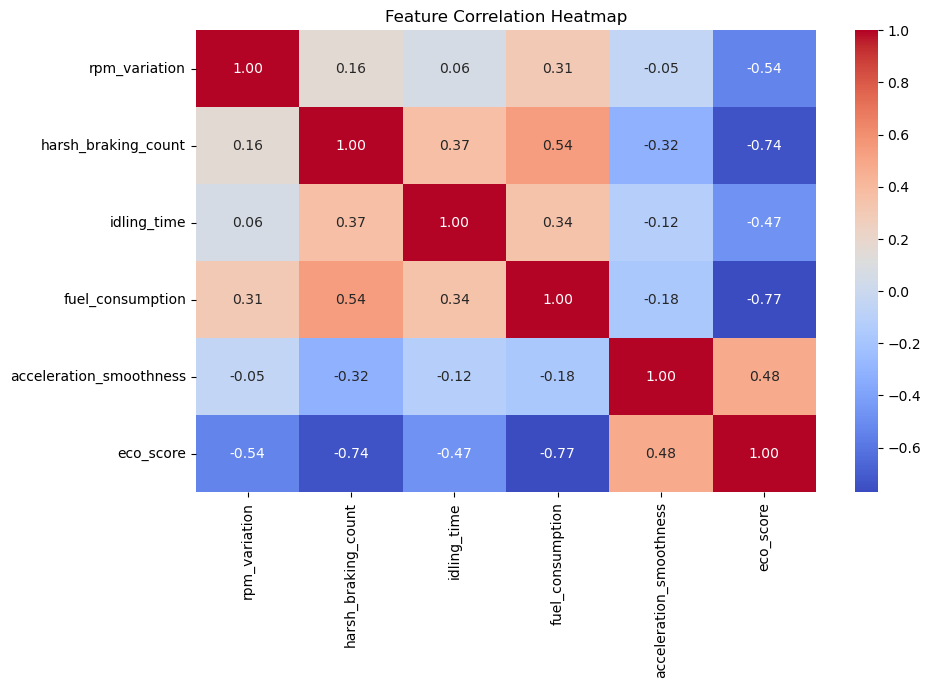

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

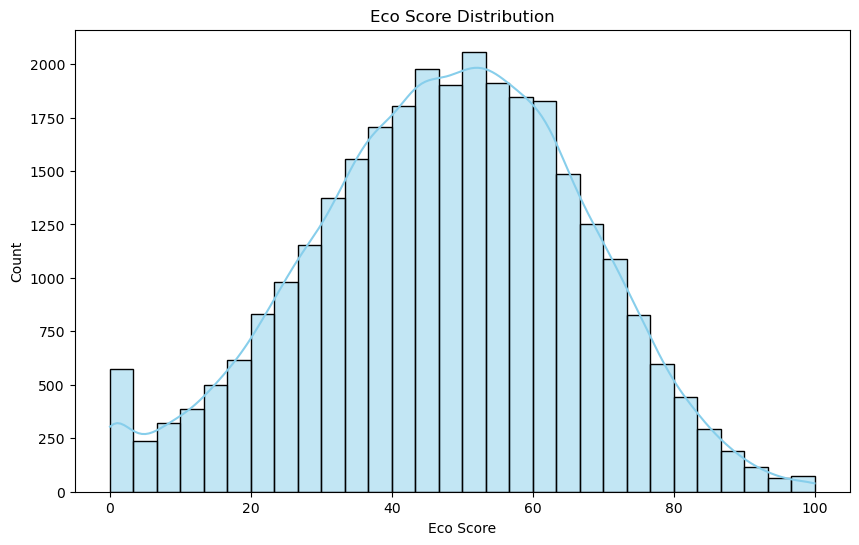

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['eco_score'],bins =30,color='skyblue',edgecolor='black',kde=True)
plt.title('Eco Score Distribution')
plt.xlabel('Eco Score')
plt.show()

[]

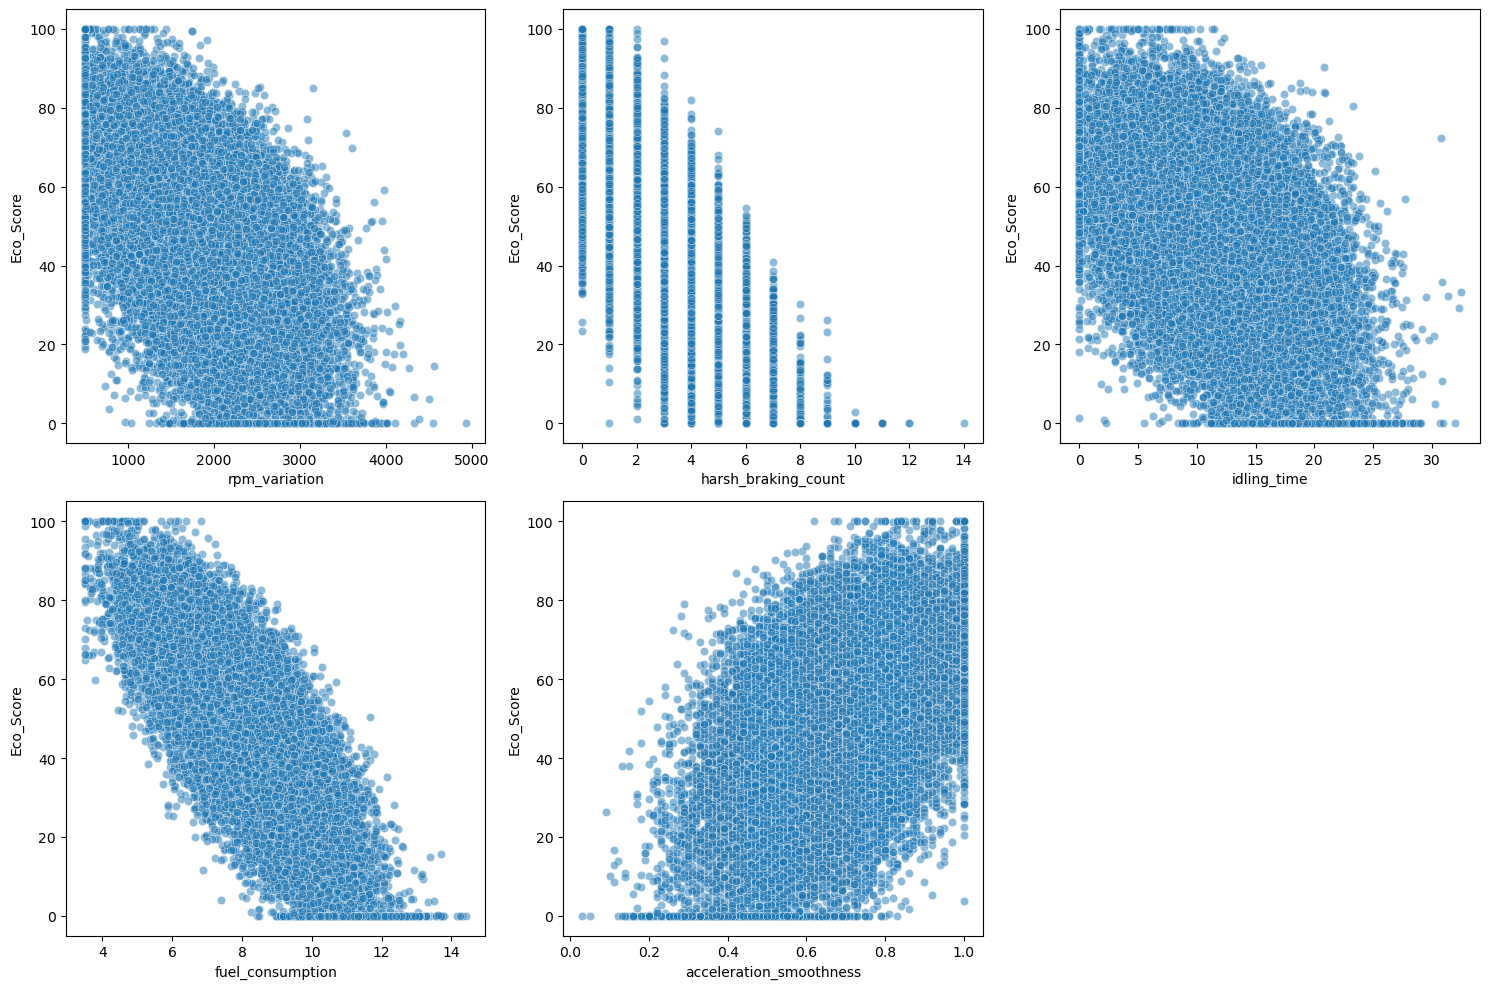

In [30]:
features = df.drop("eco_score", axis = 1).columns
plt.figure(figsize=(15,10))
for i, col in enumerate(features,1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df[col], y=df['eco_score'], alpha=0.5)
    plt.xlabel(col)
    plt.ylabel("Eco_Score")

plt.tight_layout()
plt.plot()


In [45]:
from scipy import stats
import statsmodels.formula.api as smf

In [32]:
x=df['fuel_consumption']
y=df['eco_score']

In [34]:
slope, intercept, r, p, std_err = stats.linregress(x,y)
def myfunc(x):
    return slope*x+intercept

mymodel=list(map(myfunc, x))

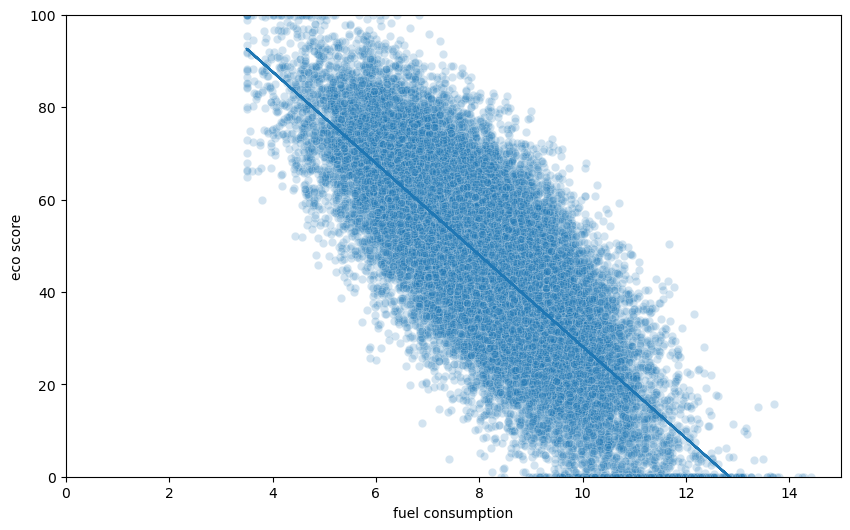

In [44]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= x, y= y, alpha=0.2)
plt.plot(x, slope*x+intercept)
plt.ylim(ymin=0, ymax=100)
plt.xlim(xmin=0, xmax=15)
plt.xlabel('fuel consumption')
plt.ylabel('eco score')
plt.show()

In [46]:
model=smf.ols('eco_score ~ fuel_consumption', data = df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              eco_score   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                 4.385e+04
Date:                Tue, 20 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:36:19   Log-Likelihood:            -1.1811e+05
No. Observations:               30000   AIC:                         2.362e+05
Df Residuals:                   29998   BIC:                         2.362e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          127.3112      0.388  

In [47]:
def predict_eco_score(fuel_consumption):
    return -9.9133*fuel_consumption+127.3112

In [61]:
fuel_cons = int(input('input your fuel consumption'))
print("your eco score prediction is", round(predict_eco_score(fuel_cons),2))

input your fuel consumption 4


your eco score prediction is 87.66


In [62]:
model2 = smf.ols('eco_score ~ fuel_consumption + harsh_braking_count', data=df)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              eco_score   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                 4.329e+04
Date:                Tue, 20 Jan 2026   Prob (F-statistic):               0.00
Time:                        09:52:09   Log-Likelihood:            -1.1126e+05
No. Observations:               30000   AIC:                         2.225e+05
Df Residuals:                   29997   BIC:                         2.226e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             116.0427    

In [63]:
def eco_score_prediction(fuel_cons, harsh_brake):
    return fuel_cons*-6.7020 + harsh_brake*-5.3525 + 116.0427

In [68]:
input1 = int(input('input your fuel consumption (range 3.5 - 14.4)'))
input2 = int(input('input your harsh braking count (range 0 - 14)'))
print('your eco score prediction is',round(eco_score_prediction(input1,input2),2))

input your fuel consumption (range 3.5 - 14.4) 9
input your harsh braking count (range 0 - 14) 12


your eco score prediction is -8.51
